In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
filepath='/content/drive/MyDrive/churn_prediction_sunbase/customer_churn_large_dataset.xlsx'
data_base=pd.read_excel(filepath)

In [ ]:
data_base.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


Check the various attributes of data like shape (rows and cols), Columns, datatypes

In [ ]:
data_base.shape

(100000, 9)

In [ ]:
data_base.columns.values

array(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'], dtype=object)

In [ ]:
#checking the data types of all columns
data_base.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [ ]:
# Checking the descriptive statistics of numeric variables
data_base.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


The dataset contains 100,000 customers with an average age of 44.03 years, an average subscription length of 12.49 months, a mean monthly bill of $65.05, and an average total usage of 274.39 GB. The age ranges from 18 to 70 years, and approximately 49.78% of customers churned (1 for churn, 0 for not).25% customers pay more than USD 82.64 per month and have a total usage more than
 387 GB  

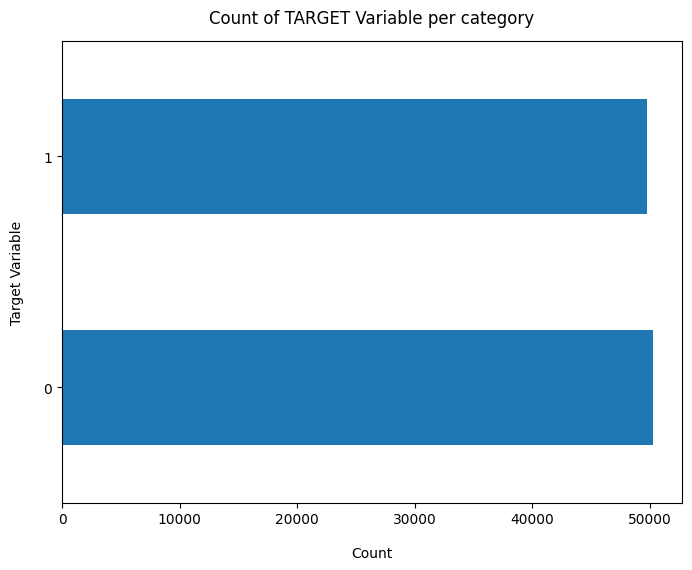

In [ ]:
data_base['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [ ]:
100*data_base['Churn'].value_counts()/len(data_base['Churn'])

0    50.221
1    49.779
Name: Churn, dtype: float64

In [ ]:
data_base['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

The distribution of classes is roughly equal, which helps in training machine learning models without a strong class imbalance bias.

In [ ]:
# Concise Summary of the dataframe using the verbose = True mode
data_base.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


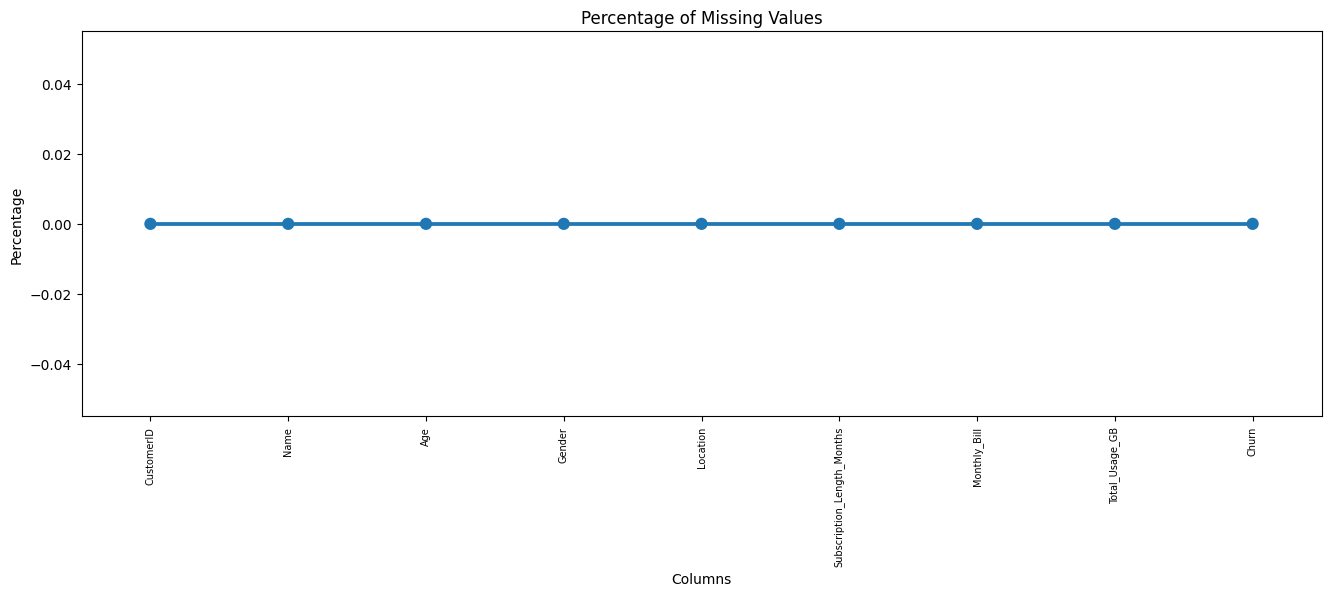

In [ ]:
missing = pd.DataFrame((data_base.isnull().sum() * 100 / data_base.shape[0])).reset_index()
missing.columns = ['Column', 'Percentage']

plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='Column', y='Percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.show()

Here, we don't have any missing data.

In [ ]:
data=data_base.copy()

In [ ]:
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


calculating total bill


In [ ]:
data['Total_Bill']=data['Monthly_Bill'] * data['Subscription_Length_Months']
data['Total_Bill'].dtype

dtype('float64')

In [ ]:
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Total_Bill
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,1247.12
1,2,Customer_2,62,Female,New York,1,48.76,172,0,48.76
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,427.35
3,4,Customer_4,36,Female,Miami,3,97.94,297,1,293.82
4,5,Customer_5,46,Female,Miami,19,58.14,266,0,1104.66


Divide customers into bins based on subsrciption length

In [ ]:
print(data['Subscription_Length_Months'].max())

24


In [ ]:
labels = ["{0} - {1}".format(i, i + 5) for i in range(1, 25, 6)]

data['Subscription_Length_Bins'] = pd.cut(data.Subscription_Length_Months	, range(1, 30, 6), right=False, labels=labels)
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Total_Bill,Subscription_Length_Bins
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,1247.12,13 - 18
1,2,Customer_2,62,Female,New York,1,48.76,172,0,48.76,1 - 6
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,427.35,1 - 6
3,4,Customer_4,36,Female,Miami,3,97.94,297,1,293.82,1 - 6
4,5,Customer_5,46,Female,Miami,19,58.14,266,0,1104.66,19 - 24


In [ ]:
data['Subscription_Length_Bins'].value_counts()

1 - 6      25064
19 - 24    25026
7 - 12     24957
13 - 18    24953
Name: Subscription_Length_Bins, dtype: int64

Age-realted Analysis

In [ ]:
data['senior_citizen']=(data['Age']>=60).astype(int)
data['middle_aged']=((data['Age']<60) & (data['Age']>=40)).astype(int)
data['young_adults']=((data['Age']>=18) & (data['Age']<40)).astype(int)
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Total_Bill,Subscription_Length_Bins,senior_citizen,middle_aged,young_adults
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,1247.12,13 - 18,1,0,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0,48.76,1 - 6,1,0,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,427.35,1 - 6,0,0,1
3,4,Customer_4,36,Female,Miami,3,97.94,297,1,293.82,1 - 6,0,0,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0,1104.66,19 - 24,0,1,0


In [ ]:
data['senior_citizen'].value_counts()

0    79281
1    20719
Name: senior_citizen, dtype: int64

In [ ]:
data['middle_aged'].value_counts()

0    62131
1    37869
Name: middle_aged, dtype: int64

In [ ]:
data['young_adults'].value_counts()

0    58588
1    41412
Name: young_adults, dtype: int64

Location analysis

In [ ]:
data_location=data.copy()

In [ ]:
data_location['Location'].value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

In [ ]:
data_location=data.set_index('Location')

In [ ]:
data_location = data.groupby('Location').agg({
    'Age': 'mean',  # Mean age
    'Monthly_Bill': 'mean',# Mean monthly bill
    'Total_Bill':'mean',# Mean total bill
    'Subscription_Length_Months':'mean',	# Mean subscription length
    'Total_Usage_GB': 'mean',  # Mean total usage
    'Churn': 'sum',  # Total churned customers
})

data_location.head()

,Age,Monthly_Bill,Total_Bill,Subscription_Length_Months,Total_Usage_GB,Churn
Location,,,,,,
Chicago,44.212697,64.819357,810.051053,12.520443,274.278134,9945
Houston,44.081609,65.127926,811.621508,12.464702,273.838865,9899
Los Angeles,43.875306,65.192377,813.123919,12.473030,273.986727,9880
Miami,44.059957,64.951278,814.105777,12.566322,274.737756,10076
New York,43.904608,65.174980,809.967837,12.425579,275.138142,9979


Remove columns not required for processing

In [ ]:
#drop column customerID and Subscription_Length_Months
data_processing=data.copy()
data_processing.drop(columns= ['CustomerID','Name','Subscription_Length_Months'], axis=1, inplace=True)


In [ ]:
data_processing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Age                       100000 non-null  int64   
 1   Gender                    100000 non-null  object  
 2   Location                  100000 non-null  object  
 3   Monthly_Bill              100000 non-null  float64 
 4   Total_Usage_GB            100000 non-null  int64   
 5   Churn                     100000 non-null  int64   
 6   Total_Bill                100000 non-null  float64 
 7   Subscription_Length_Bins  100000 non-null  category
 8   senior_citizen            100000 non-null  int64   
 9   middle_aged               100000 non-null  int64   
 10  young_adults              100000 non-null  int64   
dtypes: category(1), float64(2), int64(6), object(2)
memory usage: 7.7+ MB


EDA visualization

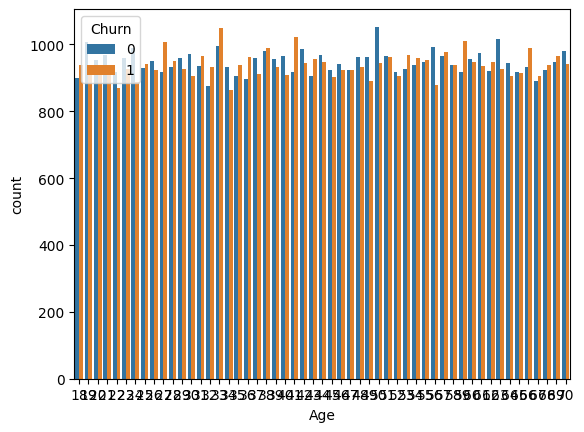

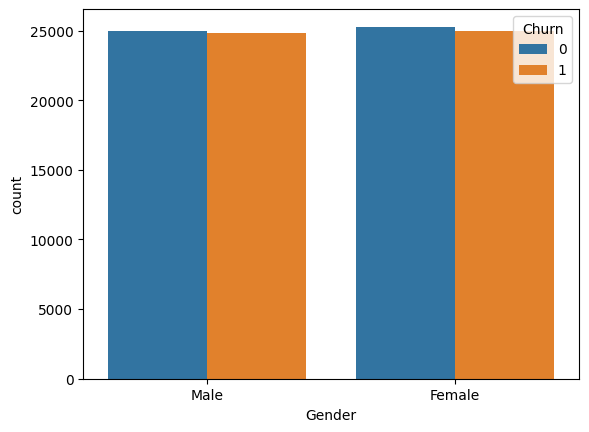

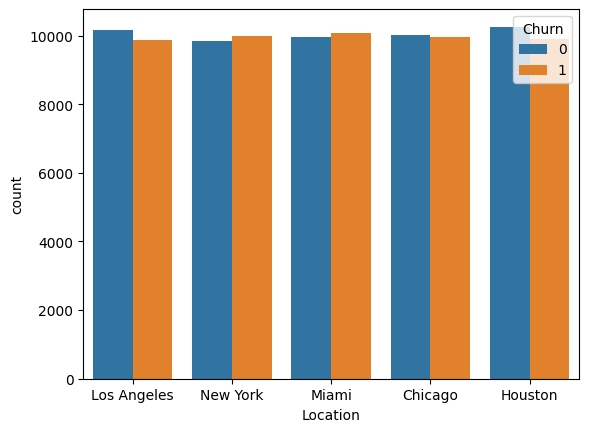

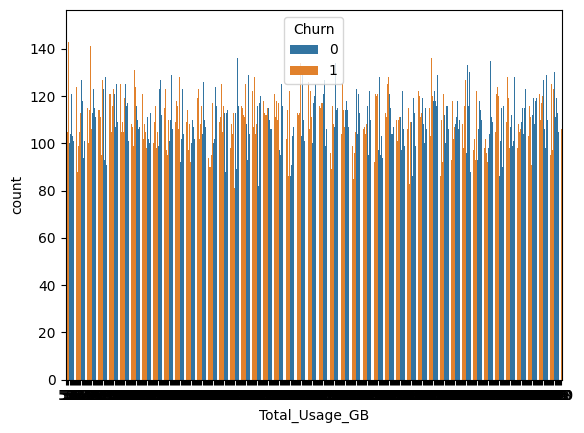

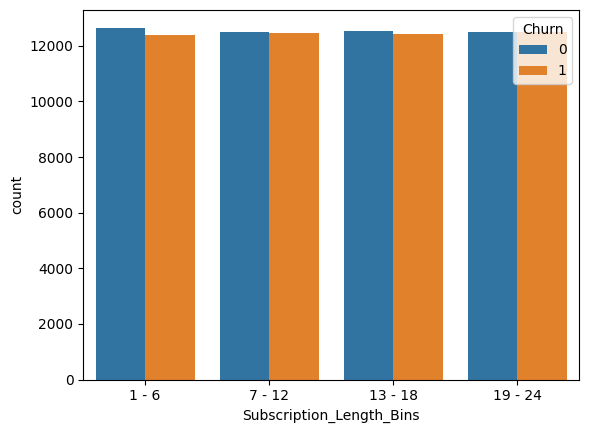

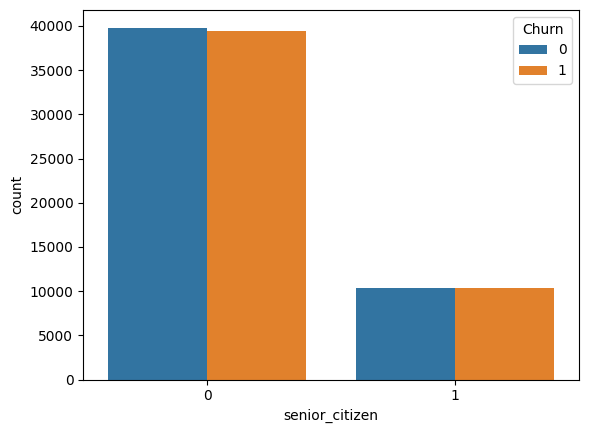

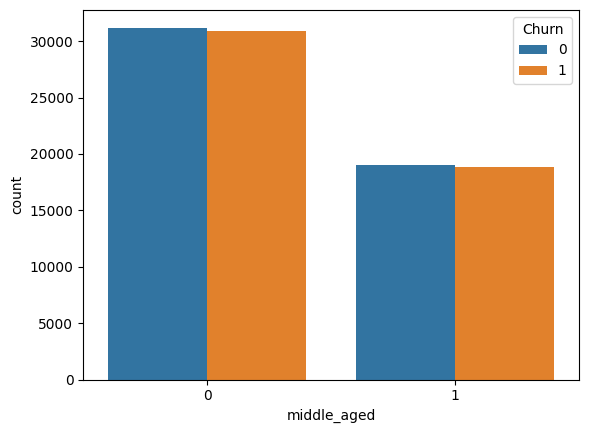

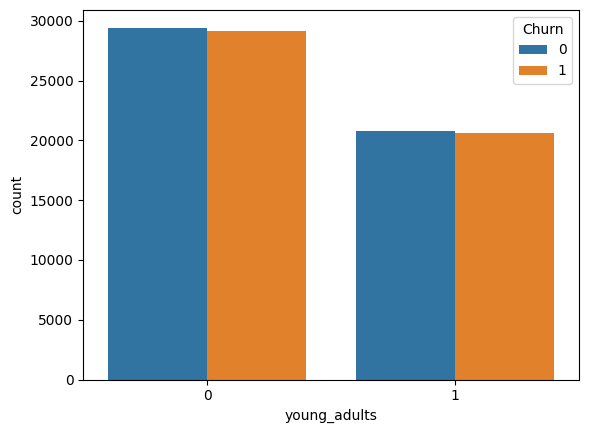

In [ ]:
for i, predictor in enumerate(data_processing.drop(columns=['Churn','Monthly_Bill','Total_Bill'])):
    plt.figure(i)
    sns.countplot(data=data, x=predictor, hue='Churn')
    #run later

 Convert all the categorical variables into dummy variables

In [ ]:
data_dummies = pd.get_dummies(data_processing)
data_dummies.head()

,Age,Monthly_Bill,Total_Usage_GB,Churn,Total_Bill,senior_citizen,middle_aged,young_adults,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Subscription_Length_Bins_1 - 6,Subscription_Length_Bins_7 - 12,Subscription_Length_Bins_13 - 18,Subscription_Length_Bins_19 - 24
0,63,73.36,236,0,1247.12,1,0,0,0,1,0,0,1,0,0,0,0,1,0
1,62,48.76,172,0,48.76,1,0,0,1,0,0,0,0,0,1,1,0,0,0
2,24,85.47,460,0,427.35,0,0,1,1,0,0,0,1,0,0,1,0,0,0
3,36,97.94,297,1,293.82,0,0,1,1,0,0,0,0,1,0,1,0,0,0
4,46,58.14,266,0,1104.66,0,1,0,1,0,0,0,0,1,0,0,0,0,1


In [ ]:
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Age                               100000 non-null  int64  
 1   Monthly_Bill                      100000 non-null  float64
 2   Total_Usage_GB                    100000 non-null  int64  
 3   Churn                             100000 non-null  int64  
 4   Total_Bill                        100000 non-null  float64
 5   senior_citizen                    100000 non-null  int64  
 6   middle_aged                       100000 non-null  int64  
 7   young_adults                      100000 non-null  int64  
 8   Gender_Female                     100000 non-null  uint8  
 9   Gender_Male                       100000 non-null  uint8  
 10  Location_Chicago                  100000 non-null  uint8  
 11  Location_Houston                  100000 non-null  ui

Relationship between Monthly bill and Total bill

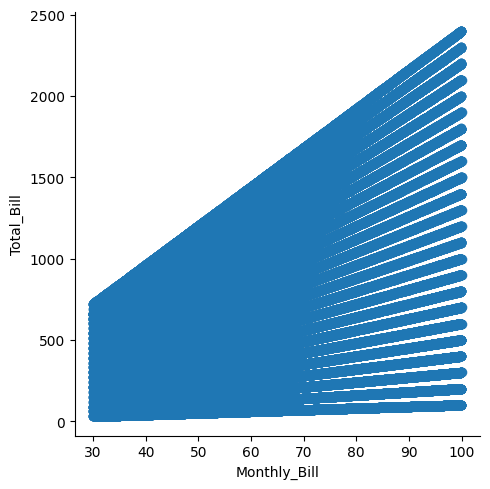

In [ ]:
sns.lmplot(data=data_dummies, x='Monthly_Bill', y='Total_Bill', fit_reg=False)

Total Charges increase as Monthly Charges increase - as expected.

Churn by Monthly Charges and Total Charges

<ipython-input-88-1a0d17dff147>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(data_dummies.Monthly_Bill[(data_dummies["Churn"] == 0) ],
<ipython-input-88-1a0d17dff147>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(data_dummies.Monthly_Bill[(data_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

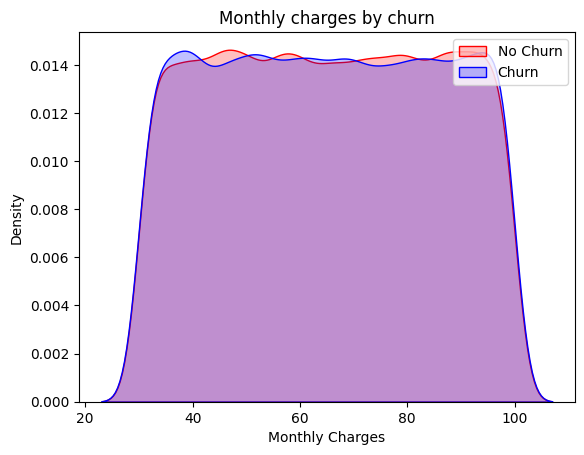

In [ ]:
Mth = sns.kdeplot(data_dummies.Monthly_Bill[(data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(data_dummies.Monthly_Bill[(data_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

churn and no churn rates are approximately the same irrespective of the monthly bill

<ipython-input-89-494b2351940e>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(data_dummies.Total_Bill[(data_dummies["Churn"] == 0) ],
<ipython-input-89-494b2351940e>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(data_dummies.Total_Bill[(data_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

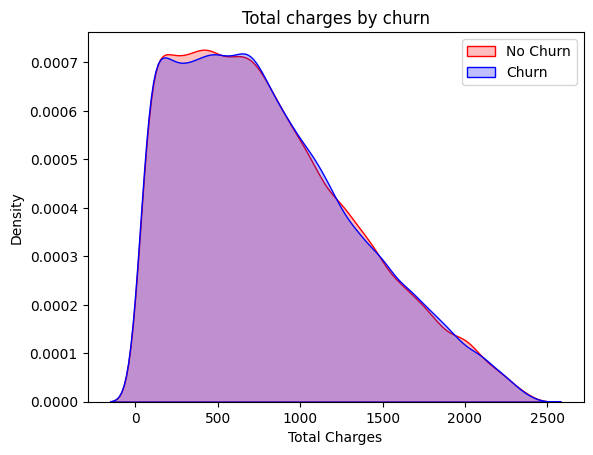

In [ ]:
Tot = sns.kdeplot(data_dummies.Total_Bill[(data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(data_dummies.Total_Bill[(data_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

churn and no churn rates are approximately the same irrespective of the total bill.

Build a corelation of all predictors with 'Churn'

<Axes: >

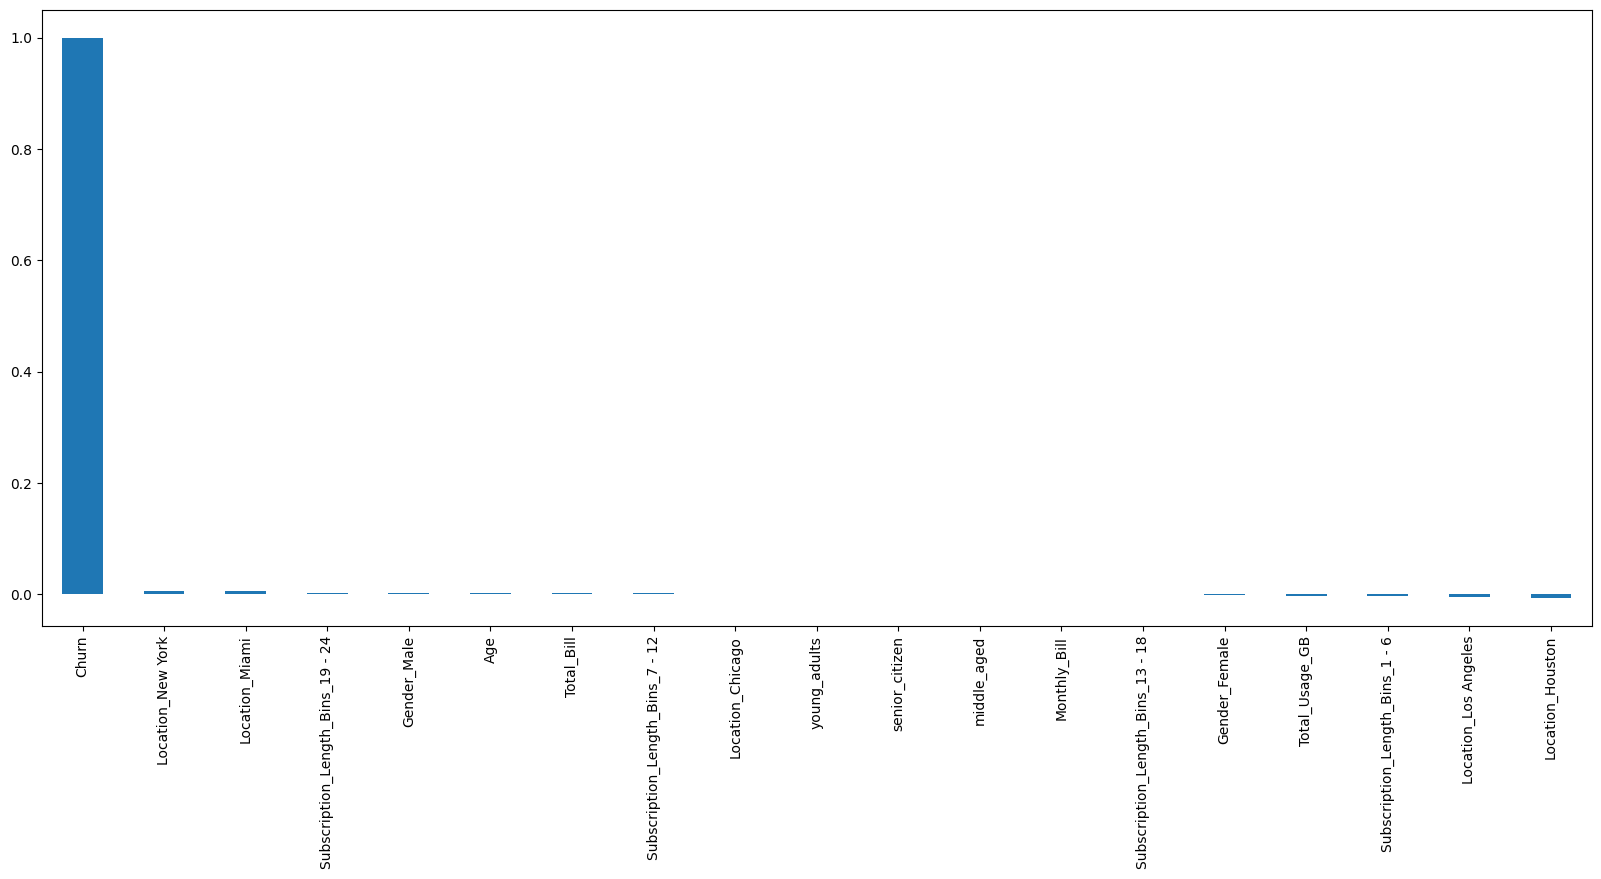

In [ ]:
plt.figure(figsize=(20,8))
data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Factors like Gender, Age, bill costs , location, subscrpition period  have almost NO impact on Churn.
Others factors which could not be extracted like mode of payment ,  Online security, Tech Support might be crucial

<Axes: >

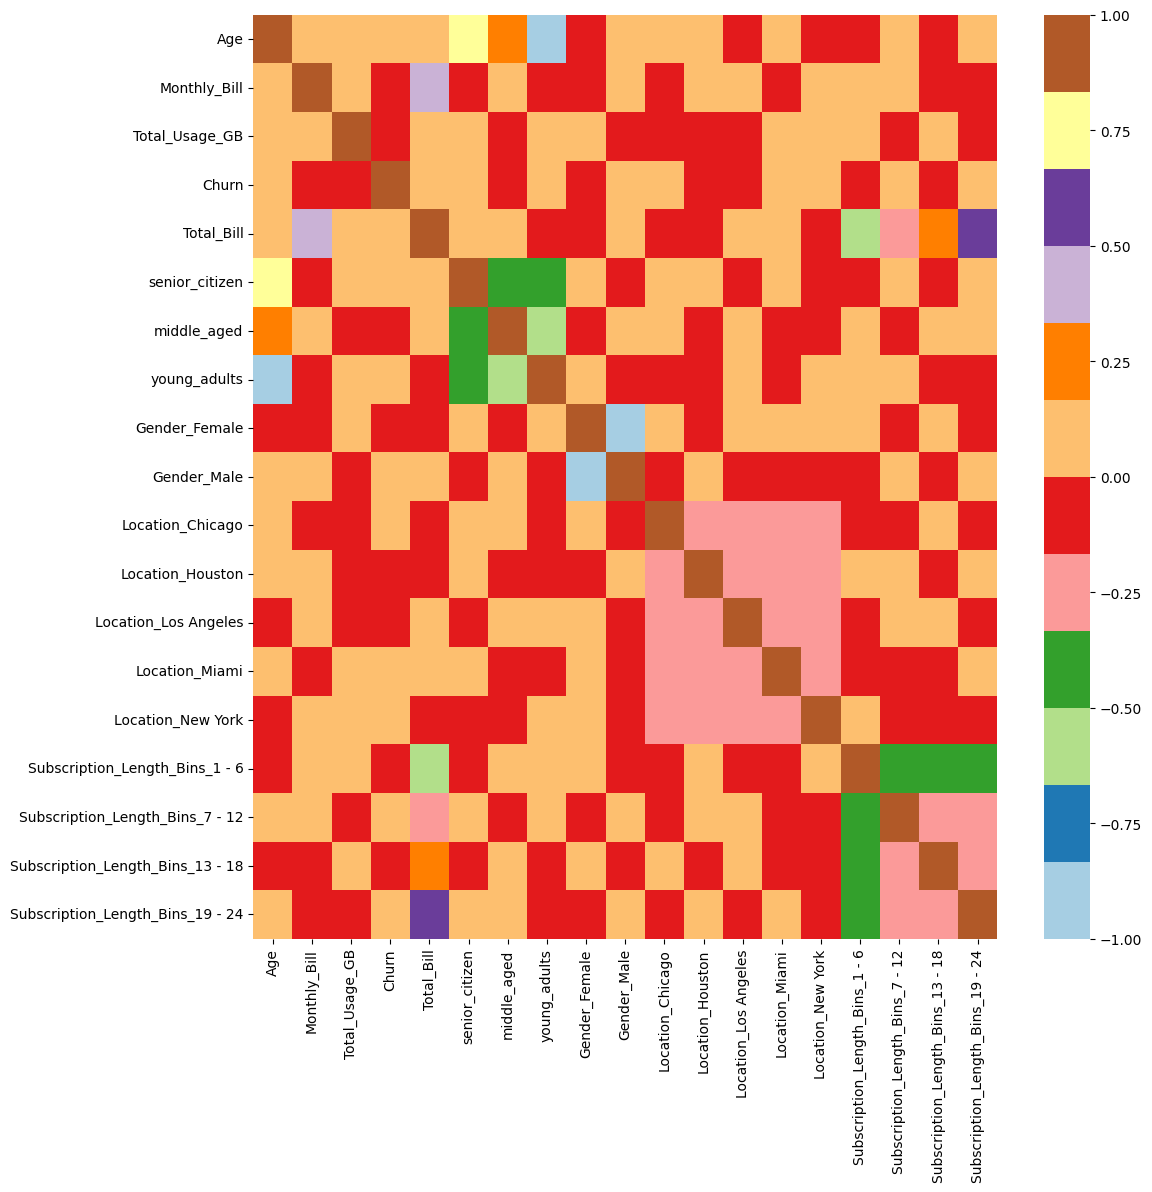

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(data_dummies.corr(), cmap="Paired")

In [ ]:
data_dummies.to_csv('Churn_data.csv')